In [179]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
iris = datasets.load_iris()

# Regresion Elastic Net

$$y = mA + b $$

Función de pérdida:
$$Loss = \sum\frac{(y_r-y_p)^2}{n} + \alpha \cdot |A| + \beta \cdot A^2$$

In [180]:
#Datas a utilizar del dataset de iris
X = np.array([[x[1], x[2], x[3]] for x in iris.data])
y_target = np.array([x[0] for x in iris.data])



In [181]:
#Divide en training y test

#saca los id del conjunto de training 80% y de test 20%
train = np.random.choice(len(X), size=round(len(X)*0.8),replace=False)
test = np.array(list(set(range(len(X)))-set(train)))

x_vals_train = X[train]
x_vals_test = X[test]

y_vals_train = y_target[train].reshape(-1,1)
y_vals_test = y_target[test].reshape(-1,1)

#Valores de los hiperparametros
batch_size = 30
learning_rate=0.0001

- $x\in\mathbb R^3$
- $A \in \mathbb R_{3\times 1}$
- $y = Ax+b\in \mathbb R$

In [182]:
# Definir variables y modelo
class Model(tf.Module):
    def __init__(self):
        self.A = tf.Variable(tf.random.normal(shape=[3, 1], dtype=tf.float32), name='A')
        self.b = tf.Variable(tf.random.normal(shape=[1, 1], dtype=tf.float32), name='b')
      
    
    def __call__(self, x_data):
        return tf.add(tf.matmul(x_data, self.A), self.b)

model = Model()

$$y = mA + b $$

Función de pérdida:
$$Loss = \sum\frac{(y_r-y_p)^2}{n} + \alpha \cdot |A| + \beta \cdot A^2$$

In [183]:
# Definir la pérdida y el optimizador
def loss_fn(model, x_data, y_target):

    elastic_param1 = tf.constant(1.0)
    elastic_param2 = tf.constant(1.0)
    l1_a_loss = tf.abs(model.A.numpy()[0][0])
    l2_a_loss = tf.square(model.A.numpy()[0][0])
    e1_term = tf.multiply(elastic_param1, l1_a_loss)
    e2_term = tf.multiply(elastic_param2, l2_a_loss)

    return tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target- model(x_data))),e1_term), e2_term), 0)

optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

In [184]:
loss_lista=[]
def train_step(model, x_data, y_target):
    with tf.GradientTape() as tape:
        
        loss = loss_fn(model, x_data, y_target)
        loss_lista.append(loss.numpy())
    gradients = tape.gradient(loss, [model.A, model.b])
    optimizer.apply_gradients(zip(gradients, [model.A, model.b]))

In [185]:
#Entremaniento del modelo

for i in range(600):
    rand_idx = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_idx]
    rand_x1 = np.array([[x] for x in rand_x], dtype=np.float32)
    #revisar la transposicion
    rand_y = np.transpose(np.array([y for y in y_vals_train[rand_idx]], dtype=np.float32))
    train_step(model, rand_x1, rand_y)
    if (i + 1) % 50 == 0:
        print('Paso #' + str(i + 1) + ", A= " + str(model.A.numpy())+" b= " + str(model.b.numpy()))

Paso #50, A= [[-0.14263077]
 [-0.23270173]
 [-0.28435266]] b= [[-0.07099368]]
Paso #100, A= [[ 0.06028883]
 [ 0.02457172]
 [-0.20147386]] b= [[-0.00431131]]
Paso #150, A= [[ 0.21610025]
 [ 0.2196274 ]
 [-0.13838232]] b= [[0.04701132]]
Paso #200, A= [[ 0.33625177]
 [ 0.36302027]
 [-0.09223329]] b= [[0.08639424]]
Paso #250, A= [[ 0.4305944 ]
 [ 0.46869063]
 [-0.05897852]] b= [[0.11712631]]
Paso #300, A= [[ 0.5044275 ]
 [ 0.5460642 ]
 [-0.03537941]] b= [[0.14129561]]
Paso #350, A= [[ 0.56366694]
 [ 0.6030189 ]
 [-0.01858638]] b= [[0.16043136]]
Paso #400, A= [[ 0.6113181 ]
 [ 0.64351207]
 [-0.00738827]] b= [[0.17586905]]
Paso #450, A= [[6.5008223e-01]
 [6.7221844e-01]
 [1.5307816e-04]] b= [[0.18819395]]
Paso #500, A= [[0.6823937 ]
 [0.69242716]
 [0.0047212 ]] b= [[0.19842653]]
Paso #550, A= [[0.7101171 ]
 [0.70576304]
 [0.00702964]] b= [[0.20709957]]
Paso #600, A= [[0.73393416]
 [0.71382546]
 [0.00748235]] b= [[0.21465106]]


In [186]:
#Fórmula de la regresion múltiple

print("y= "+str(model.A.numpy()[0][0]) + " x1 + "+str(model.A.numpy()[1][0]) + " x2 + "+str(model.A.numpy()[2][0]) + " x3 + "+str(model.b.numpy()[0][0]))


y= 0.73393416 x1 + 0.71382546 x2 + 0.007482352 x3 + 0.21465106


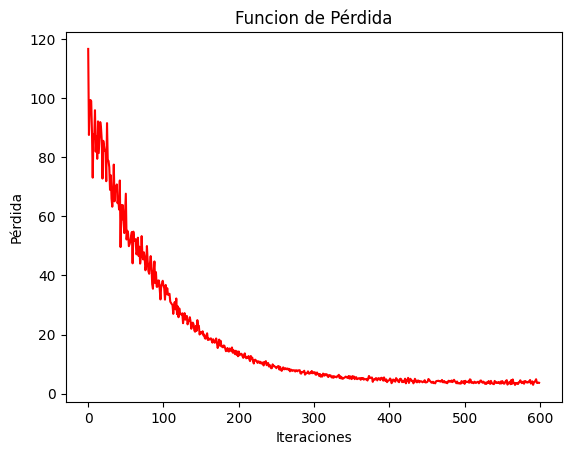

In [187]:
plt.plot(loss_lista, 'r-')
plt.title("Funcion de Pérdida")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.show()

In [188]:
#valores predichos por el modelo
y_pred = X[:,0]*model.A.numpy()[0][0]+X[:,1]*model.A.numpy()[1][0]+X[:,2]*model.A.numpy()[2][0]+X[:,0]+model.b.numpy()[0][0]

#Otra forma de calcular el error
#Error calulado con keras
mse = tf.keras.losses.MeanSquaredError()

# Calculo del MSE para el conjunto de entrenamiento
mse_train = mse(y_target, y_pred).numpy()

print("MSE en el conjunto completo: " + str(np.round(mse_train, 3)))


MSE en el conjunto completo: 5.946
